# Importing Lib and Dataset

In [2]:
import os
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adamax

print ('modules loaded')

modules loaded


In [ ]:
tr_df_path="/Users/mishalnoushad/Desktop/A2M/Brian_tumor/Training"
labels=[]
filepaths=[]

folds=os.listdir(tr_df_path)
for fold in folds:
    foldpath=os.path.join(tr_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)

        labels.append(fold)
        filepaths.append(filepath)


l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

tr_df=pd.concat([f,l],axis=1)

In [ ]:
tr_df

,filepaths,labels
0,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
1,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
2,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
3,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
4,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
...,...,...
5707,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
5708,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
5709,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
5710,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma


In [ ]:
tst_df_path="/Users/mishalnoushad/Desktop/A2M/Brian_tumor/Testing"
labels=[]
filepaths=[]

folds=os.listdir(tst_df_path)
for fold in folds:
    foldpath=os.path.join(tst_df_path,fold)
    foldlist=os.listdir(foldpath)
    for file in foldlist:
        filepath=os.path.join(foldpath,file)

        labels.append(fold)
        filepaths.append(filepath)

l=pd.Series(labels,name="labels")
f=pd.Series(filepaths,name="filepaths")

ts_df=pd.concat([f,l],axis=1)

In [ ]:
ts_df

,filepaths,labels
0,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
1,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
2,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
3,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
4,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
...,...,...
1306,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
1307,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
1308,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
1309,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma


# Data Preprocessing

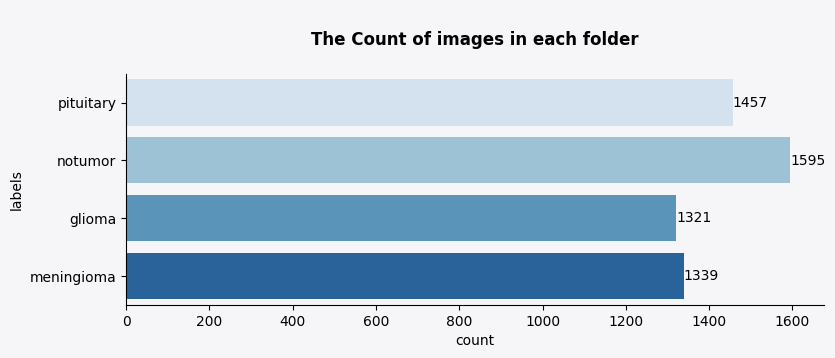

In [ ]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

x = sns.countplot(data=tr_df, y=tr_df["labels"],palette='Blues')
for container in x.containers:
    x.bar_label(container)
plt.title("\nThe Count of images in each folder\n",weight="bold");

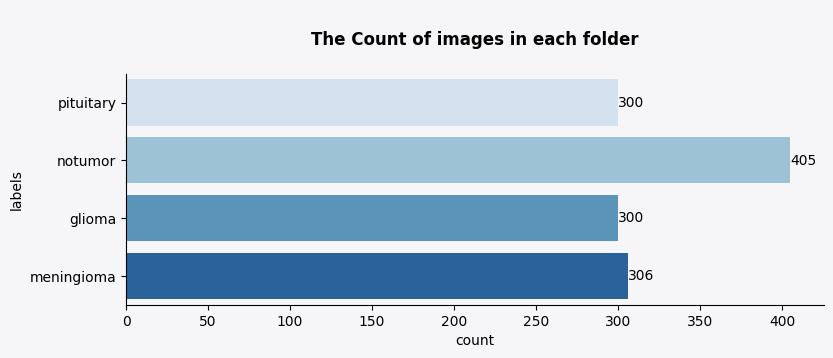

In [ ]:
fig,ax=plt.subplots(figsize=(9,3))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for i in ["right","top"]:
    ax.spines[i].set_visible(False)

i=sns.countplot(data=ts_df,y=ts_df["labels"],palette='Blues')
for container in i.containers:
    i.bar_label(container)

plt.title("\nThe Count of images in each folder\n",weight="bold");

In [ ]:
ts_df.shape

(1311, 2)

In [ ]:
valid_df,tst_df=train_test_split(ts_df,test_size=0.5,random_state=50,stratify=ts_df["labels"])
print(f"ts_df shape: {ts_df.shape}")
print("---"*10)
print(f"valid data shape: {valid_df.shape}")
print(f"test data shape: {tst_df.shape}")

ts_df shape: (1311, 2)
------------------------------
valid data shape: (655, 2)
test data shape: (656, 2)


In [ ]:
valid_df

,filepaths,labels
318,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,notumor
264,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
1088,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
979,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,glioma
502,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,notumor
...,...,...
1308,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,meningioma
132,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,pituitary
379,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,notumor
693,/Users/mishalnoushad/Desktop/A2M/Brian_tumor/T...,notumor


In [ ]:
img_size=(224,224)

tr=ImageDataGenerator()
ts=ImageDataGenerator()

train_gen=tr.flow_from_dataframe(tr_df,x_col="filepaths",y_col="labels",
                                 target_size=img_size,
                                 batch_size=16,shuffle=True,
                                 class_mode='categorical',color_mode="rgb")


valid_gen=ts.flow_from_dataframe(ts_df,x_col='filepaths',y_col='labels',
                                target_size=img_size,
                                 class_mode="categorical",color_mode="rgb",
                                 shuffle=True,batch_size=16,)


test_gen=ts.flow_from_dataframe(ts_df, x_col='filepaths', y_col='labels',
                                 target_size=img_size,
                                 batch_size=16, shuffle=False,
                                 color_mode="rgb", class_mode="categorical")

Found 5712 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


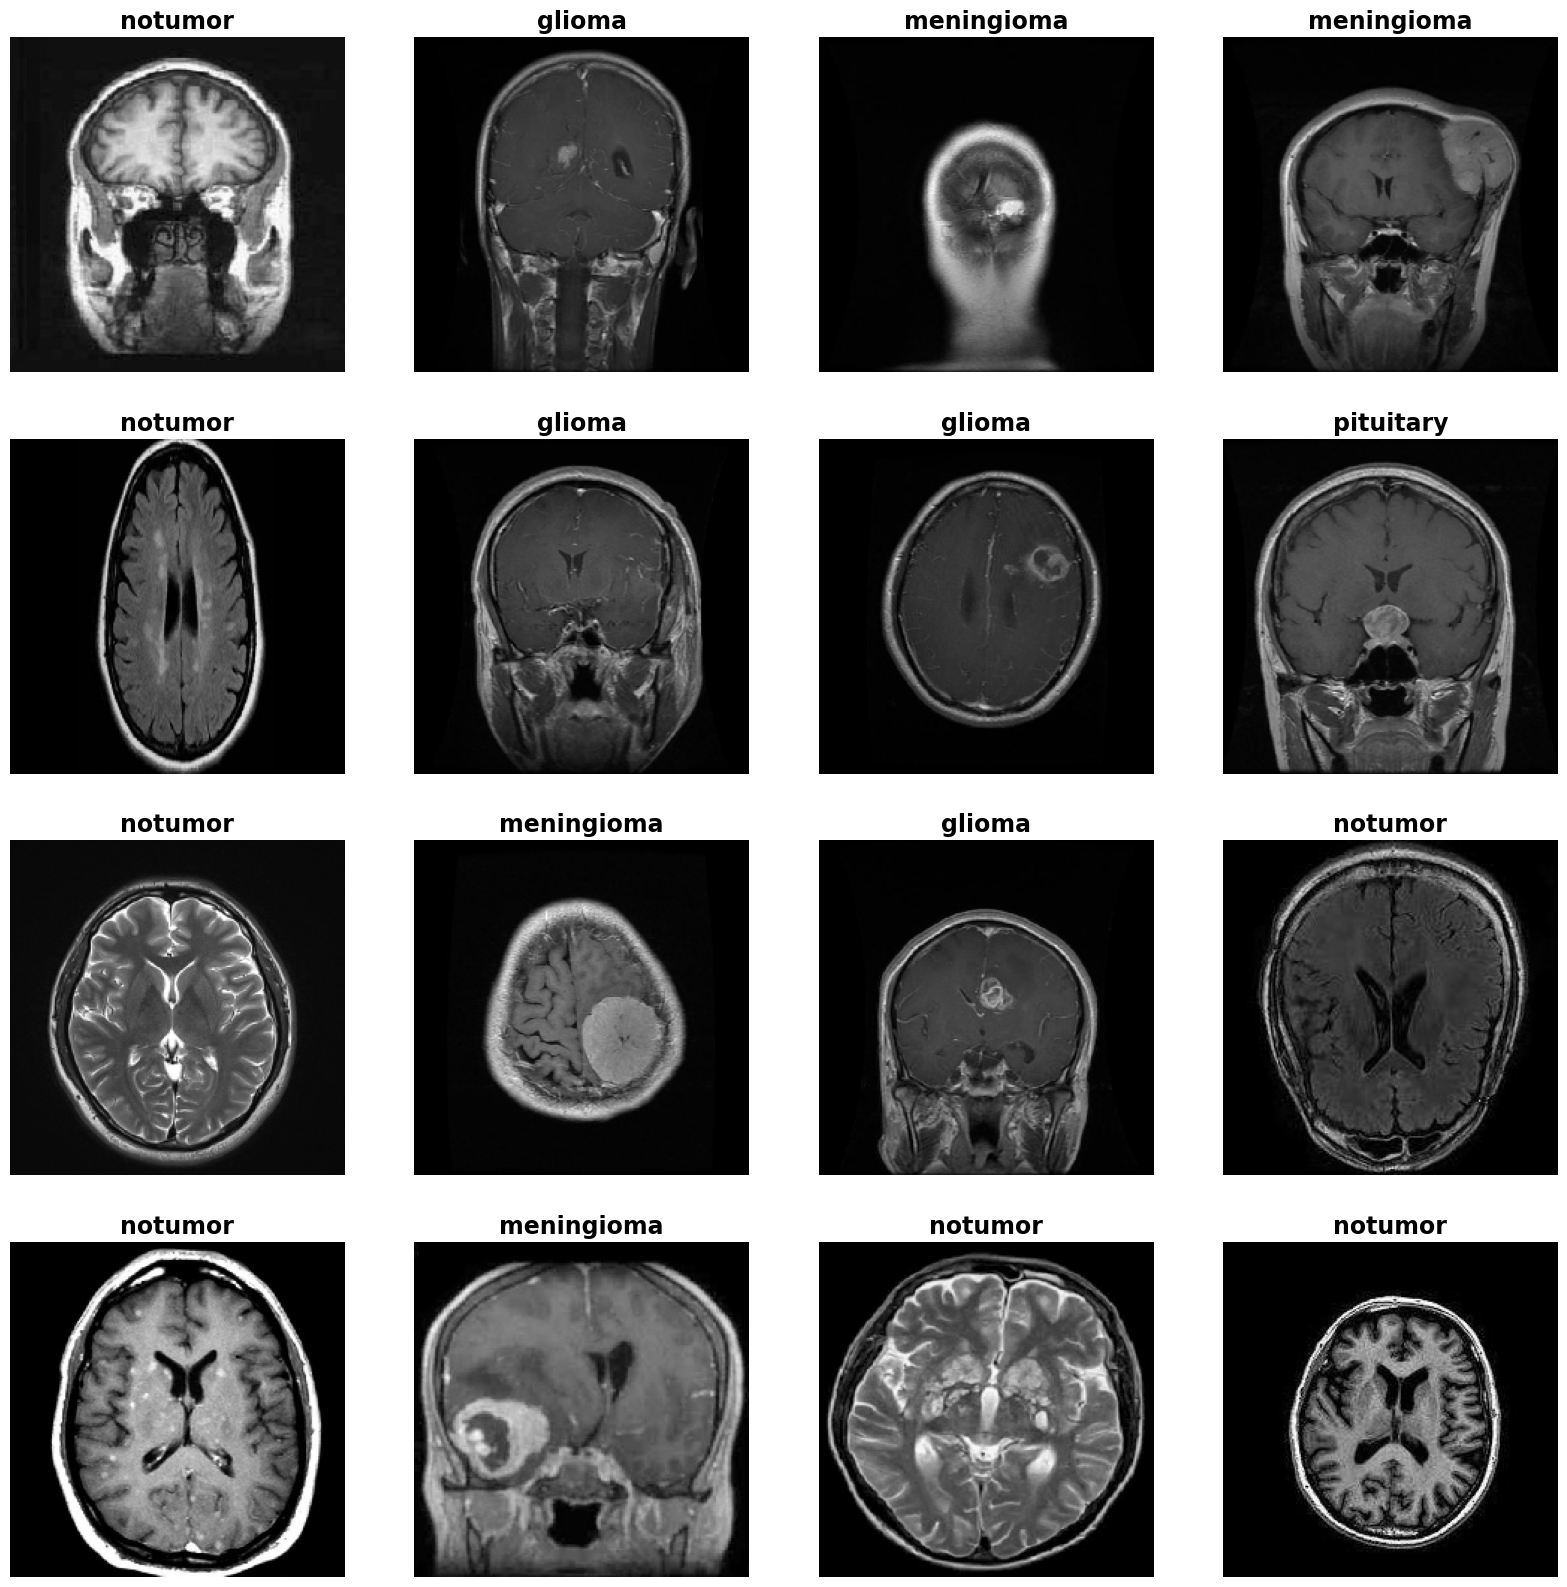

In [ ]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'black' , fontsize= 17,weight="bold")
    plt.axis('off')
plt.show()

# Model arch

In [ ]:
img_shape=(224,224,3)
base_Model = tf.keras.applications.Xception(include_top= False,weights= "imagenet",
                                            input_shape= img_shape, pooling= 'max')

Model = Sequential([
    base_Model,
    Dropout(rate= 0.5),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

Model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21124268 (80.58 MB)
Trainable params: 21069740 (80.37 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [ ]:
tf.keras.utils.plot_model(Model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Training

In [ ]:
historyy=Model.fit(train_gen,epochs=10,
                  validation_data=valid_gen,
                  shuffle=False)

Epoch 1/10
357/357 [==============================] - 1457s 4s/step - loss: 0.3463 - accuracy: 0.8801 - val_loss: 0.0900 - val_accuracy: 0.9710
Epoch 2/10
357/357 [==============================] - 1678s 5s/step - loss: 0.0973 - accuracy: 0.9697 - val_loss: 0.0592 - val_accuracy: 0.9809
Epoch 3/10
357/357 [==============================] - 1563s 4s/step - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.1022 - val_accuracy: 0.9687
Epoch 4/10
357/357 [==============================] - 1626s 5s/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0455 - val_accuracy: 0.9870
Epoch 5/10
357/357 [==============================] - 1300s 4s/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0190 - val_accuracy: 0.9939
Epoch 6/10
357/357 [==============================] - 8364s 23s/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.1418 - val_accuracy: 0.9748
Epoch 7/10
357/357 [==============================] - 2506s 7s/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.0480 - val_accuracy

# Evaluating Model

<Figure size 2000x800 with 0 Axes>

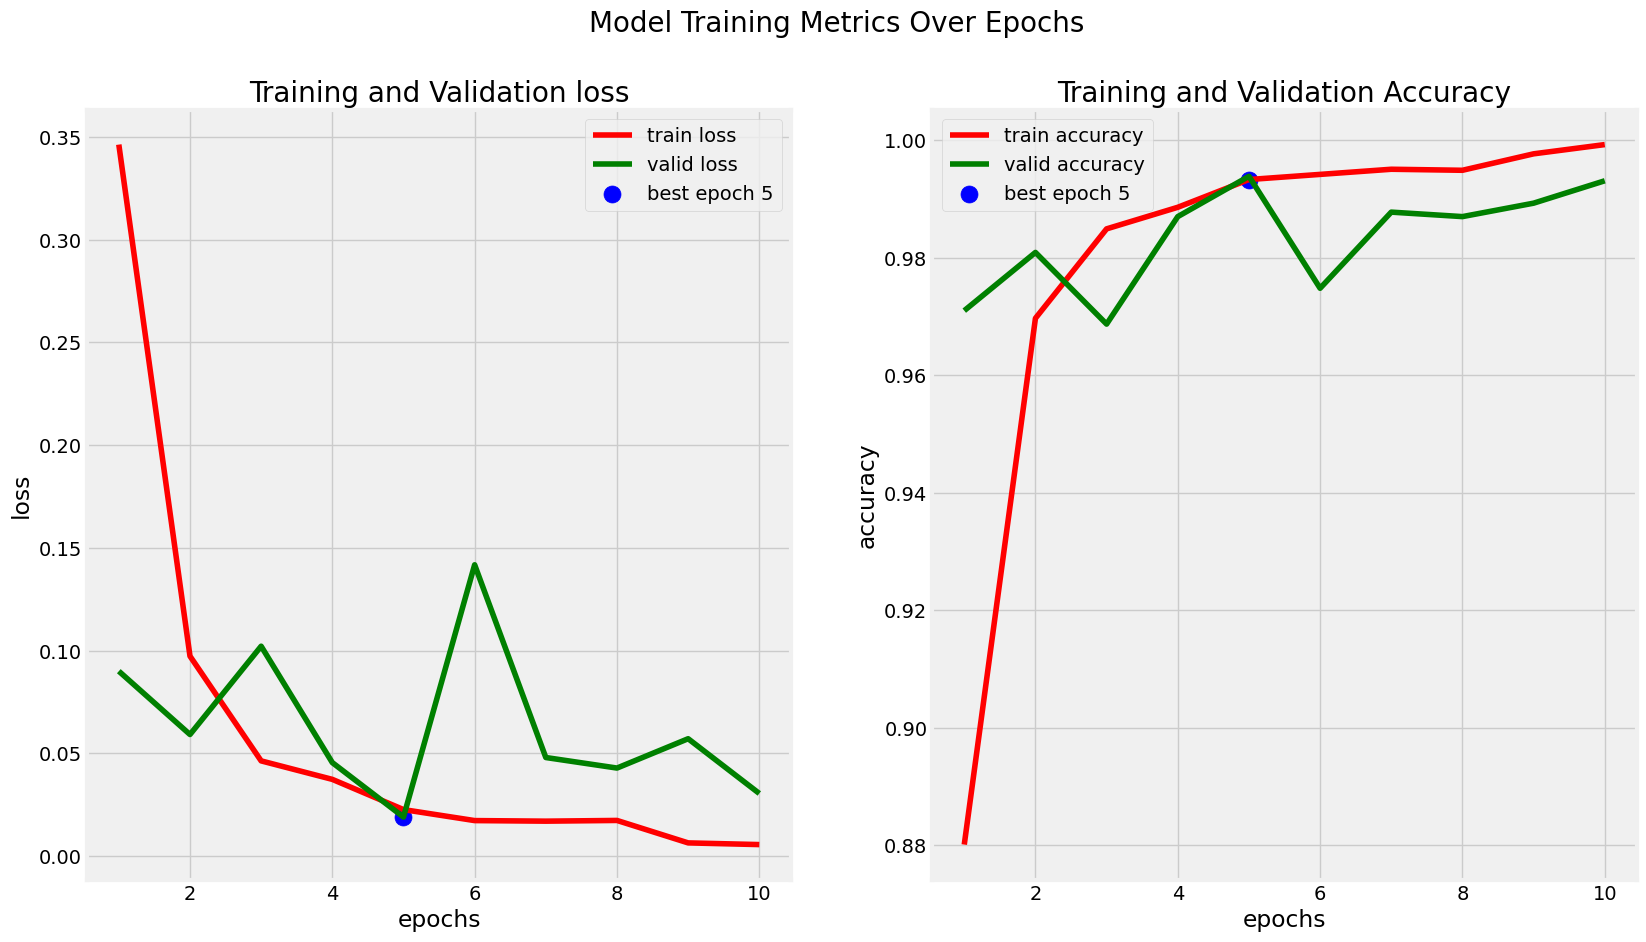

In [ ]:
plt.figure(figsize=(20, 8))
tr_loss=historyy.history["loss"]
val_loss=historyy.history["val_loss"]
index_loss=np.argmin(val_loss)
loss_lowest=val_loss[index_loss]
l_label=f"best epoch {index_loss+1}"

tr_accuracy=historyy.history["accuracy"]
val_accuracy=historyy.history["val_accuracy"]
index_acc=np.argmax(val_accuracy)
acc_highest=tr_accuracy[index_acc]
c_label=f"best epoch {index_acc+1}"

epochs=[i+1 for i in range (len(tr_accuracy))]


plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(epochs,tr_loss,"r",label="train loss")
plt.plot(epochs,val_loss,"g",label="valid loss")
plt.scatter(index_loss+1,loss_lowest,c="b",s=150,label=l_label)
plt.title('Training and Validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs,tr_accuracy,"r",label="train accuracy")
plt.plot(epochs,val_accuracy,"g",label="valid accuracy")
plt.scatter(index_acc+1,acc_highest,c="b",s=150,label=c_label)
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()


plt.suptitle('Model Training Metrics Over Epochs', fontsize=20);

# Evaluating on test set

In [ ]:
train_score=Model.evaluate(train_gen)
valid_score=Model.evaluate(valid_gen)
test_score=Model.evaluate(test_gen)

print(f"Train Loss : {train_score[0]:.3f}")
print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print("-"*20)
print(f"Validation Loss : {valid_score[0]:.3f}")
print(f"Validation Accuracy : {valid_score[1]*100:.2f}%")
print("-"*20)
print(f"Test Loss: {test_score[0]:.3f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

82/82 [==============================] - 52s 640ms/step - loss: 0.0305 - accuracy: 0.9931
Train Loss : 0.004
Train Accuracy : 99.86%
--------------------
Validation Loss : 0.031
Validation Accuracy : 99.31%
--------------------
Test Loss: 0.031
Test Accuracy: 99.31%


In [ ]:
preds=Model.predict(test_gen)
y_pred=np.argmax(preds,axis=1)

82/82 [==============================] - 43s 523ms/step


In [ ]:
cr=classification_report(test_gen.classes,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      0.98      0.99       306
           2       1.00      1.00      1.00       405
           3       0.98      1.00      0.99       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311

